In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from utils import plot_dungeon


In [2]:
a = set((1,2,3,2))
a

{1, 2, 3}

In [3]:
random.choice(list(set(a)))

1

In [28]:
class BlindDungeonGenerator:
    def __init__(self, width, height, Pc=1, Pr=1, dPc=1, dPr=1, verbose=0):
        self.width = width
        self.height = height
        self.dungeon = np.zeros((height, width), dtype=int)
        self.start_position = (random.randint(0, height-1), random.randint(0, width-1))
        self.agent_position = self.start_position
        self.directions= [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.agent_direction = random.choice(self.directions)
        self.Pc = Pc  # chance of changing direction
        self.Pr = Pr  # chance of adding room
        self.dPc = dPc
        self.dPr = dPr
        self.verbose = verbose

    def dig(self):
        x, y = self.agent_position

        while not self.is_dungeon_large_enough():
            if x < 0:
                self.dungeon = np.vstack((np.zeros_like(self.dungeon), self.dungeon))
                x += self.dungeon.shape[0]
            elif x >= self.dungeon.shape[0]:
                self.dungeon = np.vstack((self.dungeon, np.zeros_like(self.dungeon)))
                
            if y < 0:
                self.dungeon = np.hstack((np.zeros_like(self.dungeon), self.dungeon))
                y += self.dungeon.shape[1]
            elif y >= self.dungeon.shape[1]:
                self.dungeon = np.hstack((self.dungeon, np.zeros_like(self.dungeon)))
                        
            self.dungeon[x, y] = 1  # mark tile as corridor
            
            dx, dy = self.agent_direction

            x += dx
            y += dy
            
            # if x >= self.height:
            #     x = x % self.height
            # if y >=

            Nc = random.randint(0, 100)
            if Nc < self.Pc:
                if self.verbose:
                    print("changed to ", self.agent_direction)
                available_directions = self.get_available_directions()
                self.agent_direction = random.choice(available_directions)
                self.Pc = 0
            else:
                self.Pc += self.dPc

            Nr = random.randint(0, 100)
            if Nr < self.Pr:
                if self.verbose:
                    print("placed room at ", x, y)
                room_width = random.randint(3, 10)
                room_height = random.randint(3, 10)
                self.place_room(x, y, room_width, room_height)
                self.Pr = 0
                
                x += dx*room_width//2
                y += dy*room_height//2
            else:
                self.Pr += self.dPr
                


    def place_room(self, x, y, width, height):
        for i in range(x - width//2, x + (width+1)//2):
            for j in range(y - height//2, y + (height+1)//2):
                if 0 <= i < self.dungeon.shape[0] and 0 <= j < self.dungeon.shape[1]:
                    self.dungeon[i, j] = 1

    def is_dungeon_large_enough(self):
        # You can define your own condition for dungeon size here
        # For simplicity, let's assume dungeon is large enough if more than 30% of area is filled
        return np.sum(self.dungeon == 1) / (self.width * self.height) > 0.5

    def generate(self):
        self.dig()
        return self.dungeon
    
    def get_available_directions(self):
        opposit_direction = tuple(i*-1 for i in self.agent_direction)
        available_directions = set(self.directions) - set([opposit_direction, self.agent_direction])
        return list(available_directions)

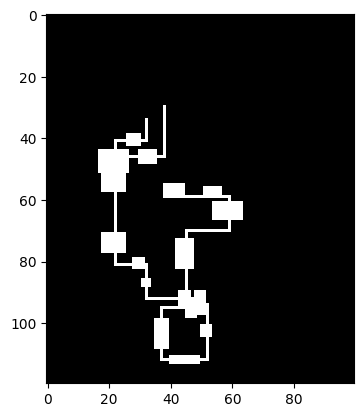

In [29]:
# Example usage
width = 50
height = 30
generator = BlindDungeonGenerator(width, height)
dungeon = generator.generate()
plot_dungeon(dungeon)


In [7]:
generator.is_dungeon_large_enough()

False